In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
titles = pd.read_csv('Movie_Id_Titles.csv')

In [61]:
dataset=pd.read_csv("Dataset.csv")

In [62]:
titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [63]:
dataset.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [64]:
titles=titles.merge(dataset,on='item_id')

In [66]:
titles.describe()

,item_id,user_id,rating,timestamp
count,100003.000000,100003.000000,100003.000000,1.000030e+05
mean,425.520914,462.470876,3.529864,8.835288e+08
std,330.797791,266.622454,1.125704,5.343791e+06
min,1.000000,0.000000,1.000000,8.747247e+08
25%,175.000000,254.000000,3.000000,8.794487e+08
50%,322.000000,447.000000,4.000000,8.828269e+08
75%,631.000000,682.000000,4.000000,8.882600e+08
max,1682.000000,943.000000,5.000000,8.932866e+08


In [67]:
titles.shape

(100003, 5)

In [68]:
titles.isnull().sum()

item_id      0
title        0
user_id      0
rating       0
timestamp    0
dtype: int64

In [75]:
len(titles['user_id'].value_counts())

944

In [76]:
max = titles['rating'].max()
min = titles['rating'].min()
print(f'high rating = {max} , low rating = {min}')

high rating = 5 , low rating = 1


In [77]:
data_rating = dict(titles['rating'].value_counts())
data_rating

{4: 34174, 3: 27145, 5: 21203, 2: 11370, 1: 6111}

<Axes: title={'center': 'Rating Count'}>

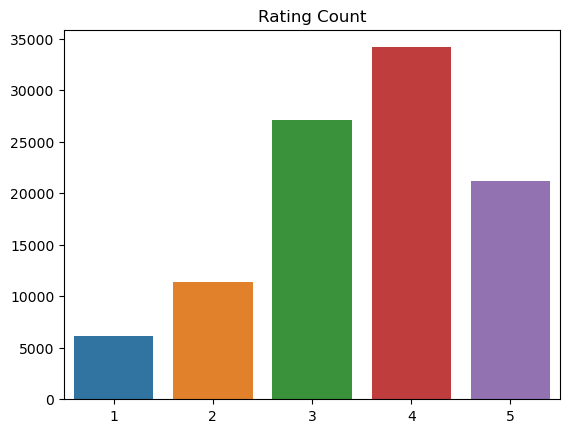

In [78]:
plt.title('Rating Count')
sns.barplot(x = list(data_rating.keys()), y = list(data_rating.values()))

In [89]:
average_rat = dict()
count_rat = dict()
for title in titles['title'].unique():
  average_rat[title] = titles[titles['title'] == title]['rating'].mean()
  count_rat[title]  = titles[titles['title'] == title]['rating'].count()
tmp_average = np.zeros((titles.shape[0]))
tmp_count  = np.zeros((titles.shape[0]))
for idx in range(data.shape[0]):
  tmp_average[idx]  = average_rat[titles['title'][idx]]
  tmp_count[idx] = count_rat[titles['title'][idx]]
titles['average_rating'] = tmp_average
titles['count_rating'] = tmp_count
titles.head(2)

,item_id,title,user_id,rating,timestamp,average_rating,count_rating
0,1,Toy Story (1995),308,4,887736532,3.878319,452.0
1,1,Toy Story (1995),287,5,875334088,3.878319,452.0


In [90]:
C = titles[['average_rating']].mean()
M = titles['count_rating'].quantile(0.90)

In [91]:
Q_movies = titles.copy().loc[titles['count_rating'] >=M] # place qualified data beacuse we want top of them
Q_movies.shape

(10127, 7)

In [92]:
def weighted_rating(x, M=M, C=C):
    v = x['count_rating']
    R = x['average_rating']
    # Calculation based on the IMDB formula
    return (v/(v+M) * R) + (M/(M+v) * C)

In [93]:
Q_movies['score'] = Q_movies.apply(weighted_rating , axis = 1)
Q_movies = Q_movies.sort_values('score' , ascending = False)

In [94]:
Q_movies['title'].unique()[:15] 

array(['Star Wars (1977)', 'Godfather, The (1972)',
       'Silence of the Lambs, The (1991)',
       'Raiders of the Lost Ark (1981)', 'Fargo (1996)', 'Titanic (1997)',
       'Empire Strikes Back, The (1980)', 'Return of the Jedi (1983)',
       'Pulp Fiction (1994)', 'Fugitive, The (1993)', 'Toy Story (1995)',
       'Contact (1997)', 'Chasing Amy (1997)',
       'Back to the Future (1985)', 'Twelve Monkeys (1995)'], dtype=object)

In [95]:
len(Q_movies['title'].unique())

24

<Axes: title={'center': 'Top 15 Movies'}>

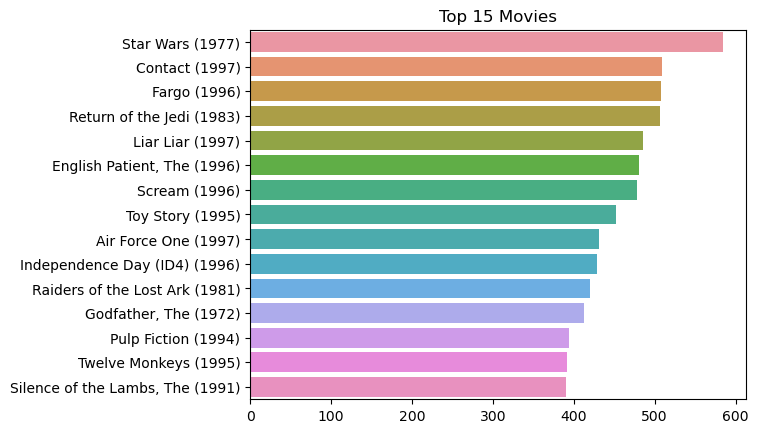

In [96]:
tmp_d = Q_movies['title'].value_counts()
plt.title('Top 15 Movies')
sns.barplot(y=tmp_d.keys()[:15], x=tmp_d.values[:15])

<Axes: title={'center': 'Count Movies'}>

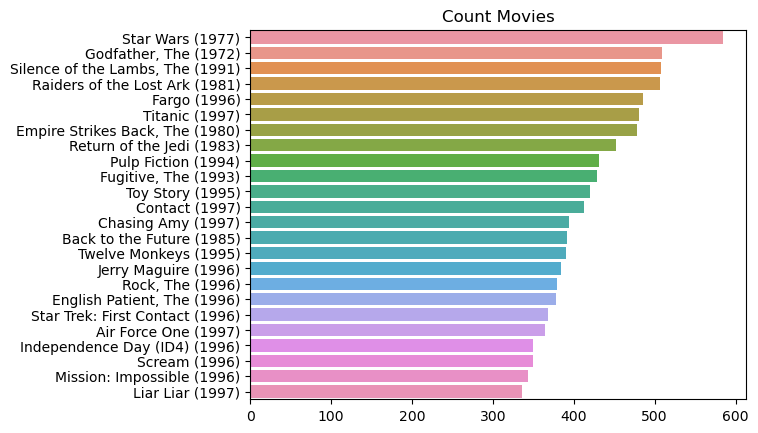

In [97]:
plt.title('Count Movies')
sns.barplot(y = list(Q_movies['title'].unique()) , x = list(Q_movies['title'].value_counts()))

In [98]:
movie_rate = titles.pivot_table(index = 'user_id' ,columns = 'title' , values ='rating')
movie_rate.fillna(0 , inplace = True)

In [99]:
movie_rate.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
df = pd.DataFrame()
df['count_rating'] = pd.DataFrame(titles.groupby('title')['rating'].count())

In [101]:
df.head()

,count_rating
title,
'Til There Was You (1997),9
1-900 (1994),5
101 Dalmatians (1996),109
12 Angry Men (1957),125
187 (1997),41


In [115]:
def get_recommendations(title , min_rating_count = 50):

    user_rating = movie_rate[title]

    similar_movies = movie_rate.corrwith(user_rating)

    corr_movies = pd.DataFrame(similar_movies , columns = ['correlations'])

    corr_movies.dropna(inplace = True)

    corr_movies = corr_movies.join(df['count_rating'], how='left', lsuffix='_left', rsuffix='_right')

    final = corr_movies[corr_movies['count_rating'] > min_rating_count].sort_values('correlations' , ascending = False)

    return final

In [116]:
recommended = get_recommendations('Year of the Horse (1997)')
recommended.head(15)

,correlations,count_rating
title,,
Money Talks (1997),0.235931,92
Sirens (1994),0.187562,59
Deconstructing Harry (1997),0.154465,65
In the Company of Men (1997),0.137049,66
Enchanted April (1991),0.134486,70
Ulee's Gold (1997),0.132283,184
Kull the Conqueror (1997),0.131986,69
"Apostle, The (1997)",0.129643,55
How to Make an American Quilt (1995),0.123879,71


<Axes: title={'center': 'Best 15 Movies For Year of the Horse Movie'}>

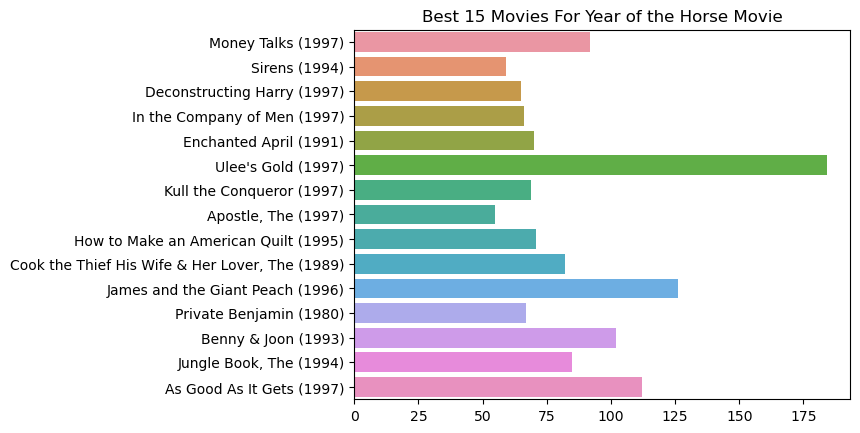

In [117]:
plt.title('Best 15 Movies For Year of the Horse Movie')
sns.barplot(y = list(recommended.index)[:15] , x = list(recommended['count_rating'])[:15])